In [ ]:
# Example taken from https://www.pyimagesearch.com/2014/07/28/a-slic-superpixel-tutorial-using-python/
# For detailed implementations, follow https://medium.com/@darshita1405/superpixels-and-slic-6b2d8a6e4f08

<ipython-input-1-6cb54e97dfbf>:17: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(image, n_segments = numSegments, sigma = 5)


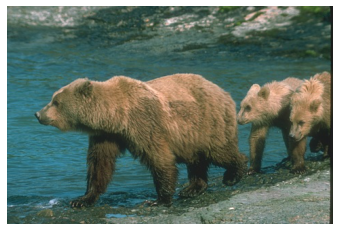

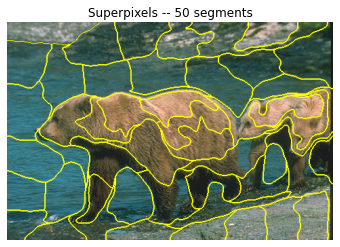

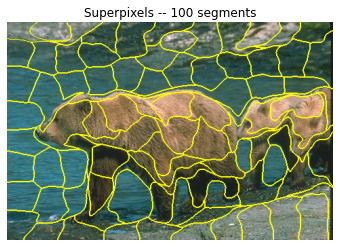

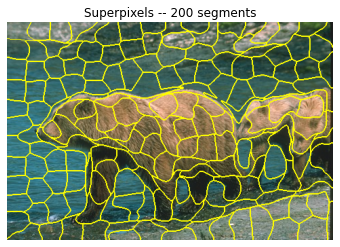

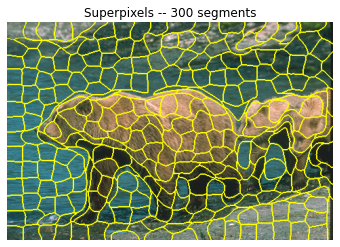

In [1]:
# import the necessary packages
from skimage.segmentation import slic # Super Linear Iterative Clusterring
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt

# load the image and convert it to a floating point data type
image = img_as_float(io.imread('100075-Bear.jpg'))

plt.imshow(image), plt.axis("off")

# loop over the number of segments
for numSegments in (50, 100, 200, 300):
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(image, n_segments = numSegments, sigma = 5)
    # show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments" % (numSegments))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.title("Superpixels -- %d segments" % (numSegments))
    plt.axis("off")

# show the plots
plt.show()

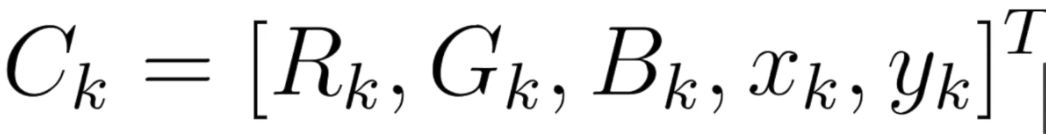

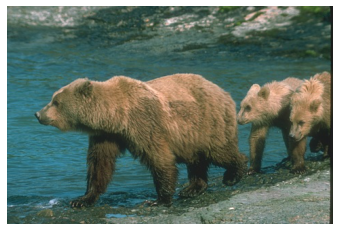

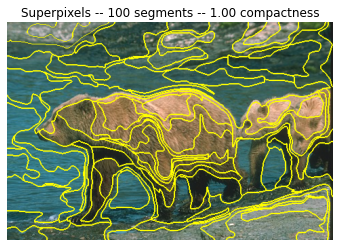

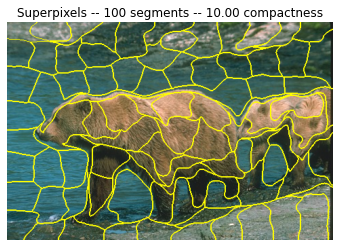

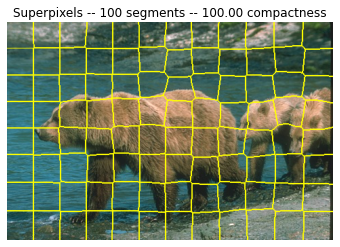

In [16]:
# Fixing the number of segments, changing the compactness
plt.imshow(image), plt.axis("off")

# compactness: Balances color proximity and space proximity. Higher values give more weight to space proximity,
# making superpixel shapes more square/cubic.

num_segments = 100
# loop over the number of segments
for compact in (1, 10, 100):  # Default value of compactness is 10
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(image, n_segments = num_segments, compactness=compact, sigma = 5)
    # show the output of SLIC
    fig = plt.figure("Superpixels compactness --- %.2fd" % (compact))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.title("Superpixels -- %d segments -- %.2f compactness" % (num_segments, compact))
    plt.axis("off")

# show the plots
plt.show()

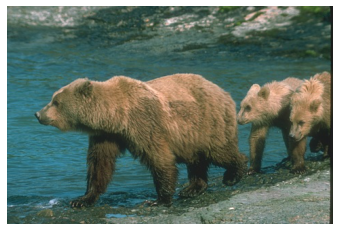

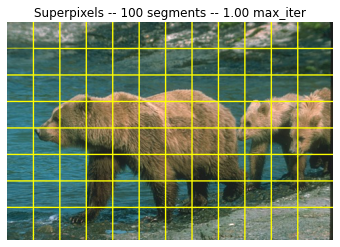

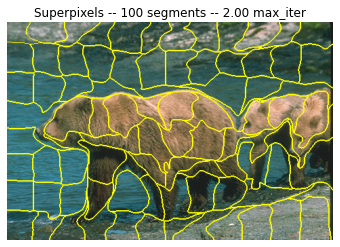

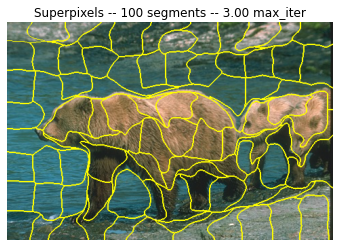

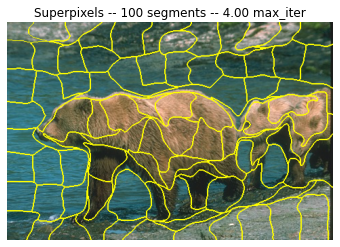

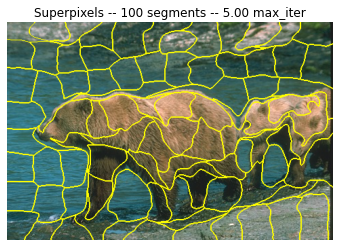

In [13]:
# Fixing the number of segments, changing the compactness, iterative version to cause convergence of superpixels
# set number of iterations to limit runtime if superpixels do not converge
plt.imshow(image), plt.axis("off")

num_segments = 100
compact = 10
# loop over the number of segments
for max_i in (1, 2, 3, 4, 5):  # Default value of max_iter = 5
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(image, n_segments = num_segments, compactness=compact,
                  max_iter=max_i, sigma = 5)
    # show the output of SLIC
    fig = plt.figure("Superpixels compactness --- %d" % (max_i))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.title("Superpixels -- %d segments -- %.2f max_iter" % (num_segments, max_i))
    plt.axis("off")

# show the plots
plt.show()